# Part 2: Classification Churn avec deux méthodes de balancements des données 

# 1- Introduction
Les gens ont tendance à s'abonner et désabonner aux offres quotidiennes, notamment les offres de salle de sport, internet et téléphonique ..., nous dans notre cas, on va devoir voir les offres des opérateurs téléphoniques pour voir étudier les raisons d'abonnements à ses offres qui va faire des gains à l'entreprise en question, aussi on étudiera pour savoir les causes du désabonnement de ces offres qui à pour conséquence une perte de client aux concurrents de marché. <br>
Afin de prévenir les changements de ce désabonnement de client, on doit comprendre et apprendre comment les détecter les raisons du départ d'une manière efficace. Cette recherche vise à identifier les facteurs de désabonnement les plus pertinents ainsi qu’à prédire le désabonnement ou pas  à l’aide des algorithmes de Classification qui ont pour but de classifier et prédire si un groupe de personnes présentent une forme de développer un futur désabonnement ou pas.


#  2- Importation des données


In [1]:
### Imports des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, log, exp

# chargement des données
churn_DF = pd.read_csv('churn.csv',sep=',')

# affichage des informations du dataset
churn_DF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
#Afficher la forme du dataset(nbTuples,nbColonnes)
churn_DF.shape

(7043, 21)

<h2>Attribute Information:</h2>

-- 1. customerID: identifiant de client <br>
-- 2. gender: genre du client<br>
-- 3. SeniorCitizen: si le client represente une personne agé ou pas<br>
-- 4. Partner: Si le client à une partenaire<br>
-- 5. Dependents: Si le client est dependant ou pas<br>
-- 6. tenure: ancienneté dans l'abbonnement actuel<br>
-- 7. PhoneService: Si il y'a un service téléphonique<br>
-- 8. MultipleLines: Si le client a plusieurs lignes ou pas <br>
-- 9. InternetService: Si le client possede un abbonnement internet ou pas et du quel type si jamais il en a<br>
-- 10. OnlineSecurity: Si l'abbonement propose une sécurité en ligne ou pas<br>
-- 11. OnlineBackup: Si le client à la sauvegarde en ligne ou pas<br>         
-- 12. DeviceProtection: Si l'abbonnement propose la protection de materiel du client ou pas<br>                        
-- 13. TechSupport:Si l'abbonnement propose un support technique au client ou pas <br>                        
-- 14. StreamingTV: Si l'abbonnement propose du streaming TV au client ou pas<br>                        
-- 15. StreamingMovies: Si l'abbonnement propose du streaming movies au client ou pas<br>                        
-- 16. Contract: Type du contract du client<br>  
-- 17. PaperlessBilling: Si le client recevera ses factures sous format numérique ou pas<br>
-- 18. PaymentMethod: Methode du payement<br>                        
-- 19. MonthlyCharges: Les charges mensuel à regler<br>                        
-- 20. TotalCharges: Les charges totales à regler<br>                        
-- 21. Churn: personne abbonné ou désabonné<br>                        


#####  Transformation des éspaces vides ' ' vers NaN et detection des valeurs manquantes
Avant de se lancer au data pre-processing, on a remarqué que le dataset avait des valeurs manquantes de forme ' ', de là on va  remplacer les valeurs de ‘ ’ par NaN(null).

In [3]:
#Remplacement des "' '" par des NaN
churn_DF = churn_DF.replace(' ',np.nan)

#Affichage des informations des colonnes
churn_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Colonnes avec les valeurs manquantes:
['TotalCharges']


<AxesSubplot:title={'center':'Plot bar de nombres de valeurs manquantes pour chaque attribut'}>

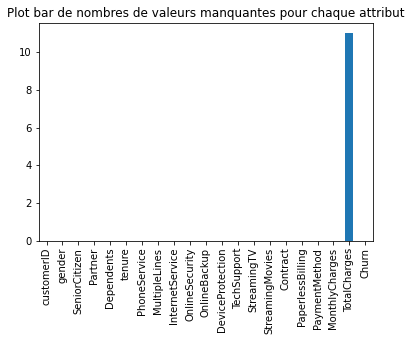

In [4]:
#Sur ces lignes de codes, on va compter le nombre de valeurs manquantes pour chaque colonne du dataset
na_count = churn_DF.isnull().sum()
na_columns = list(na_count[na_count>0].index.values)

#Affichage des colonnes avec des missing values
print("Colonnes avec les valeurs manquantes:")
print(na_columns)

#Affichage des colonnes avec le nombre de missing values en plot bar
na_count.plot(kind = "bar", title="Plot bar de nombres de valeurs manquantes pour chaque attribut")

D'apres les deux derniers bouts de code, on aperçoit qu'on a des données manquantes sur la colonne "TotalCharges" avec 11 valeurs vides manquantes non renseignés qu'on va par la suite traiter dans une prochaine partie.

#####  Modification des types des colonnes du dataset
C'est une étape qui precede l'etape de data understanding, pour celà on repere les colonnes qui devraient etre de base en type int ou float et on les trouves object, puis on change le type au bon type desiré.

In [5]:
#Affichage les informations des datasets pour voir le type de chaque colonne
churn_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


a partir de ces informations, on peut voir que la colonne 'TotalCharges ' est de type object alors qu'elle devait etre de type float car çà retourne un float qui est les charges totale d'une personne.

In [6]:
#typage des données
churn_DF.TotalCharges  = churn_DF.TotalCharges.astype(float)
churn_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#####  Exploration des valeurs uniques possibles du dataset
çà permet de voir les differentes valeurs uniques du dataset pour chaque colonne, et si jamais y'a des valeurs non uniques, on peu les fusionner.

In [7]:
#Affichage des valeurs uniques de chaque Colonne du dataset
for col in churn_DF:
    print("Column", col,"unique values: ",churn_DF[col].unique())

Column customerID unique values:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column gender unique values:  ['Female' 'Male']
Column SeniorCitizen unique values:  [0 1]
Column Partner unique values:  ['Yes' 'No']
Column Dependents unique values:  ['No' 'Yes']
Column tenure unique values:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column PhoneService unique values:  ['No' 'Yes']
Column MultipleLines unique values:  ['No phone service' 'No' 'Yes']
Column InternetService unique values:  ['DSL' 'Fiber optic' 'No']
Column OnlineSecurity unique values:  ['No' 'Yes' 'No internet service']
Column OnlineBackup unique values:  ['Yes' 'No' 'No internet service']
Column DeviceProtection unique values:  ['No' 'Yes' 'No internet service']
Column TechSupport unique values:  ['No' '

A partir de cette vérification sur l'unicité des valeurs, on apperçoit qu'il y'a l'unicité des valeurs de chaque colonne. 

#  3- Compréhension des données
<br>
Etude statistique avec des nombres qui vont resumé les proprietés des données qu'on étudie.<br>
Avant d’effectuer l’étape de data pre-processing, on doit d’abord comprendre les données, cela peut nous aider à mieux appliquer nos connaissances en data pre-processing, car on peut comprendre nos données et on peu éventuellement trouver des anomalies dans nos données qu’on va traiter par la suite dans la partie de data pre-processing.


## 3-1 Mesures de tendance centrale
Dans cette étape, on va voir les différentes mesures comme : mean, mean trimmed, median, min, max, mode et distribution de chaque attribut, et on va voir la distribution de la maladie sur label Class.

###### Mean (Weighted arithmetic mean):

SeniorCitizen        0.162147
tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2283.300441
dtype: float64

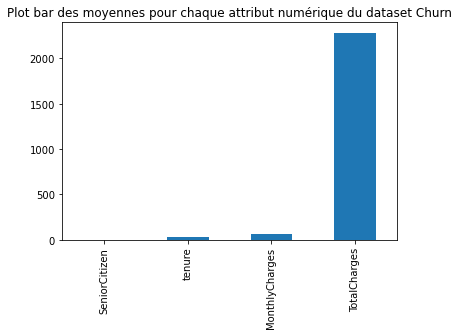

In [8]:
#Mean Weighted arithmetic mean:
#Transformation et affichage des moyennes du chaque colonne dans un plot bar
means = churn_DF
means.mean(skipna=True).plot(kind='bar',title="Plot bar des moyennes pour chaque attribut numérique du dataset Churn")
means.mean()

On peu voir que la colonne TotalCharges a la plus grande moyenne entre les autres colonnes.

##### Trimmed Mean (Without Min Max):


SeniorCitizen        0.162051
tenure              32.370118
MonthlyCharges      64.760631
TotalCharges      2282.711963
dtype: float64

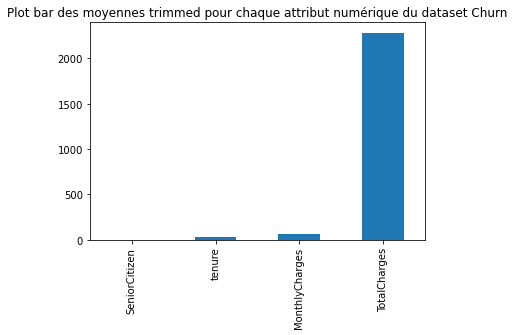

In [9]:
# Trimmed MEAN:
# On recupere les colonnes qui ont des valeurs Numeric et non categorique
trimmed = means.drop(['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], axis=1)

#Calcul des Trimmed Means
trimmed=(trimmed.sum() - trimmed.min() - trimmed.max()) / (trimmed.notnull().sum() - 2)

#Affichage des moyennes coupées pour chaque attribut du dataset dans un plot bar
trimmed.plot(kind='bar',title="Plot bar des moyennes trimmed pour chaque attribut numérique du dataset Churn")
trimmed

En appliquant les deux moyennes, on voit pas vraiment de grande difference entre les résultats des deux moyennes de Mean Weight et de Mean Trimmed sur les features de Dataset Churn, ces moyennes pour les deux façons de calculs sont presque identiques. 

##### Median:

SeniorCitizen        0.000
tenure              29.000
MonthlyCharges      70.350
TotalCharges      1397.475
dtype: float64

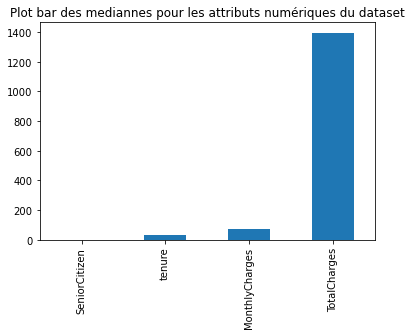

In [10]:
#Median
#Affichage des mediannes pour toutes les colonnes du dataset dans plot bar
means.median().plot(kind='bar',title="Plot bar des mediannes pour les attributs numériques du dataset")

#affichage des mediannes des colonnes à part
means.median()


##### Mode:

  gender  SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines  \
0   Male              0      No         No       1          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   

      PaymentMethod  MonthlyCharges  TotalCharges Churn  
0  Electronic check           20.05          20.2    No  


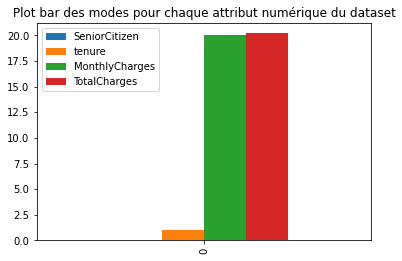

In [11]:
#Mode: Le mode d'un ensemble de valeurs est la valeur qui apparaît le plus souvent. Il peut s'agir de plusieurs valeurs.
#Affichage des modes pour chaque colonne du dataset en Plot Bar
modes = means.drop(['customerID'], axis=1)
modes.mode(dropna=True).plot(kind='bar',title="Plot bar des modes pour chaque attribut numérique du dataset")

#Affichage des modes pour chaque colonne du dataset dans un tableau
print(modes.mode(dropna=True))


On peut voir que la plupart de la population de ce dataset sont: des males et des gens qui sont rester abbonnées au service proposé.

###### Max:

In [12]:
#MAX 
#affichage des maxs de chaque colonnes du dataset
print("Max de chaque attribut:")
modes.max()

Max de chaque attribut:


gender                      Male
SeniorCitizen                  1
Partner                      Yes
Dependents                   Yes
tenure                        72
PhoneService                 Yes
MultipleLines                Yes
InternetService               No
OnlineSecurity               Yes
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies              Yes
Contract                Two year
PaperlessBilling             Yes
PaymentMethod       Mailed check
MonthlyCharges            118.75
TotalCharges              8684.8
Churn                        Yes
dtype: object

On remarque sur les max des valeurs qu'on a que la valeur maximale des Charges Totales est a 8684,8.

###### Min:

In [13]:
#Min
#affichage des mins de chaque colonnes du dataset
print("Min de chaque attribut:")
modes.min()

Min de chaque attribut:


gender                                 Female
SeniorCitizen                               0
Partner                                    No
Dependents                                 No
tenure                                      0
PhoneService                               No
MultipleLines                              No
InternetService                           DSL
OnlineSecurity                             No
OnlineBackup                               No
DeviceProtection                           No
TechSupport                                No
StreamingTV                                No
StreamingMovies                            No
Contract                       Month-to-month
PaperlessBilling                           No
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          18.25
TotalCharges                             18.8
Churn                                      No
dtype: object

On remarque sur les max des valeurs qu'on a que la valeur minimale des Charges Totales est a 18,8.

##### Distribution Gaussienne


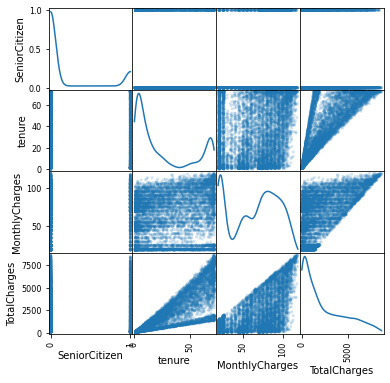

In [14]:
#Distribution Gaussienne
from pandas.plotting import scatter_matrix

#Affichage de la matice scatter pour afficher les differents graphes de distrubution des donnees de chaque colonne
scatter_matrix(churn_DF, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()


A partir de cette matrix scatter plot, on aperçoit que les attributs suivants ne sont pas en distrubution gaussienne, par la suite il faut les transformer, on verra çà dans une prochaine étape dans la data transformation.

##### Distribution de Churn (Abbonnement et désabbonnement) aux offres


Nombre de gens abbonnés aux offres: 5174
Nombre de gens désabbonnant à l'offre: 1869


<AxesSubplot:title={'center':"Plot bar de nombres d'abbonnées et désabbonnant aux offres"}>

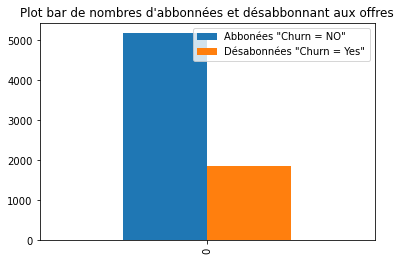

In [15]:
# Distribution of Autism disease
# Valeur de Class NO = non malade sinon YES =  malade
# Calcule le nombre de malades et non malades du dataset, et affichage des gens malades et non malades
abbonne = (churn_DF['Churn'] == 'No')
print("Nombre de gens abbonnés aux offres:",abbonne.sum())
desabbonne = (churn_DF['Churn'] == 'Yes')
print("Nombre de gens désabbonnant à l'offre:",desabbonne.sum())

# Création d'uun dataframe pour les affichées par la suite
d = {'Abbonées "Churn = NO"': [abbonne.sum()], 'Désabonnées "Churn = Yes"': [desabbonne.sum()]}
df = pd.DataFrame(data=d)

#Affichage du nombres de malade et non malades du dataset initial à partir du dataframe créer dans cette section
df.plot(kind = "bar", title="Plot bar de nombres d'abbonnées et désabbonnant aux offres")


On apperçoit à partir de ce petit test et de ce plot, que les classes sont imbalanced; ça implique que le dataset est imbalanced, et qu'on a besoin de traiter ce type de probleme qu'on vas voir dans les prochaines étapes.

## 3-2 Mesures de la dispersion des données
Dans cette étape, on va voir les différentes mesures comme : quartiles, Interquartiles, Variance et standard déviation.

###### Quartiles et  detection de outliers


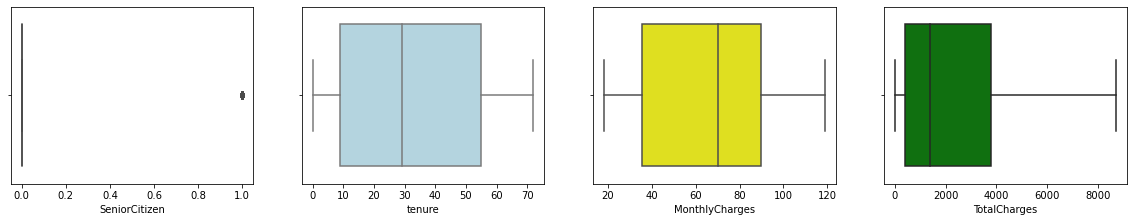

In [16]:
#Quartiles et outliers
#Affichage en boxplot des de la distribution des données du chaque colonne à valeurs numéric

plt.figure(figsize= (20,15))

plt.subplot(4,4,1)
sns.boxplot(x= churn_DF['SeniorCitizen'], color='red')

plt.subplot(4,4,2)
sns.boxplot(x= churn_DF['tenure'], color='lightblue')

plt.subplot(4,4,3)
sns.boxplot(x= churn_DF['MonthlyCharges'], color='yellow')

plt.subplot(4,4,4)
sns.boxplot(x= churn_DF['TotalCharges'], color='green')

plt.show()

A partir de ces plots on apperçoit qu'il ne y'a pas de outlier. 

##### Quantiles


In [17]:
#Quantiles
#Q1 et Q2 et Q3
# affichage des quantiles du chaque colonne numeric du dataset
print("Les quantiles du dataset")
x = churn_DF.quantile([0.25,0.5,0.75])
x

Les quantiles du dataset


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0.25,0.0,9.0,35.50,401.4500
0.50,0.0,29.0,70.35,1397.4750
0.75,0.0,55.0,89.85,3794.7375


<AxesSubplot:title={'center':'Graphe affichant les differents quantiles des attributs'}>

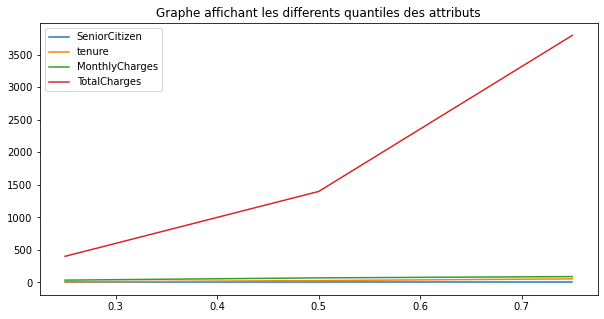

In [18]:
#Affichage d'un graphe des differents quantiles du dataset pour les attributs numeric
x.plot(figsize=(10,5),title="Graphe affichant les differents quantiles des attributs")

A partir de la figure ci dessus on peut en conclure, que la moitié des utilisateurs payent des charges totales supérieur à 1397.4750.

###### Variance and standard deviation 


In [19]:
#Variance and standard deviation 
#Variance
print("La variance des attributs du data set")
print(churn_DF.var())
print()
#Standard deviation
print("La deviation standard des attributs du data set")
print(churn_DF.std())


La variance des attributs du data set
SeniorCitizen     1.358745e-01
tenure            6.031681e+02
MonthlyCharges    9.054109e+02
TotalCharges      5.138252e+06
dtype: float64

La deviation standard des attributs du data set
SeniorCitizen        0.368612
tenure              24.559481
MonthlyCharges      30.090047
TotalCharges      2266.771362
dtype: float64


#  4-  Pre-processing des données
## 4-1 Data cleaning
 

Comme c'était le cas à partir de la partie de data understanding (section 3), on a été confronté à un probleme majeur, notamment le probleme de des valeurs manquantes sur les colonnes "TotalCharges". 

#### Missing values
Pour cette partie, on doit remplir les valeurs manquantes de la colonne TotalCharges de type float. A partir de là, on remplit les valeurs manquantes avec la medianne de la meme colonne en question.

In [20]:
#Missing values problem resolution 
missing_DF = churn_DF

#Affichage de nombres de valeurs nulles pour chaque colonne du dataset 
print('Nombre de valeurs manquantes pour chaque attribut de dataset:')
for colonne in missing_DF.columns:
    print('\t%s: %d' % (colonne,missing_DF[colonne].isna().sum()))

Nombre de valeurs manquantes pour chaque attribut de dataset:
	customerID: 0
	gender: 0
	SeniorCitizen: 0
	Partner: 0
	Dependents: 0
	tenure: 0
	PhoneService: 0
	MultipleLines: 0
	InternetService: 0
	OnlineSecurity: 0
	OnlineBackup: 0
	DeviceProtection: 0
	TechSupport: 0
	StreamingTV: 0
	StreamingMovies: 0
	Contract: 0
	PaperlessBilling: 0
	PaymentMethod: 0
	MonthlyCharges: 0
	TotalCharges: 11
	Churn: 0


In [21]:
#Résolution du probleme de valeurs manquantes avec la median
churn_DF.TotalCharges =  churn_DF.TotalCharges.fillna(churn_DF.TotalCharges.median())

In [22]:
#On affiche le nombres de valeurs manquantes pour chaque colonne de dataset apres la data imputaion
print('Nombre de valeurs manquantes pour chaque attribut de dataset:')
for colonne in churn_DF.columns:
    print('%s: %d' % (colonne,churn_DF[colonne].isna().sum()))

Nombre de valeurs manquantes pour chaque attribut de dataset:
customerID: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 0
Churn: 0


Et la on voit  zero valeurs manquantes sur tout le dataset

## 4-1-1- Analyse des données
<br><b>Remarque:</b>
Cette analyse de données se porte sur le dataset apres avoir fait de data cleaning sur ce dernier(no missing data)


<h6>Taux de Personnes Senior et non Senior</h6>

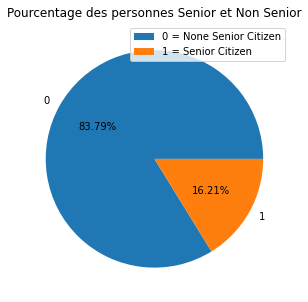

In [23]:
from collections import Counter

fig, ax = plt.subplots(figsize=(5, 5))
count = Counter(churn_DF['SeniorCitizen'])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Pourcentage des personnes Senior et Non Senior')
plt.legend(["0 = None Senior Citizen","1 = Senior Citizen"])
plt.show()

La figure desssus représente un diagramme circulaire décrivant les taux des personnes Senior et non Senior dans cette étude. On constate sur ce diagramme que la plupart des personnes sont des non Senior avec un taux de 83,79% de la population étudier.

<h6>Taux de souscription à l'offre de Phone Service</h6>

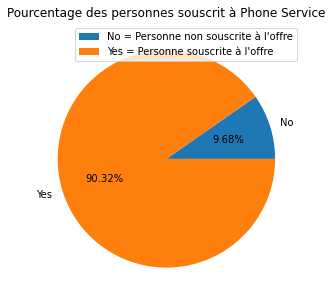

In [24]:
from collections import Counter

fig, ax = plt.subplots(figsize=(5, 5))
count = Counter(churn_DF['PhoneService'])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Pourcentage des personnes souscrit à Phone Service')
plt.legend(["No = Personne non souscrite à l'offre","Yes = Personne souscrite à l'offre"])

plt.show()

La figure desssus représente un diagramme circulaire décrivant les taux des personnes souscrites et non souscrites à l'offre de Phone Service. On constate sur ce diagramme que la plupart des personnes sont Souscrites à cette offre avec un taux de 90,32% de la population étudier.

<h6>Frequence de désabbonnement (churn) ou pas par rapport au sex</h6>

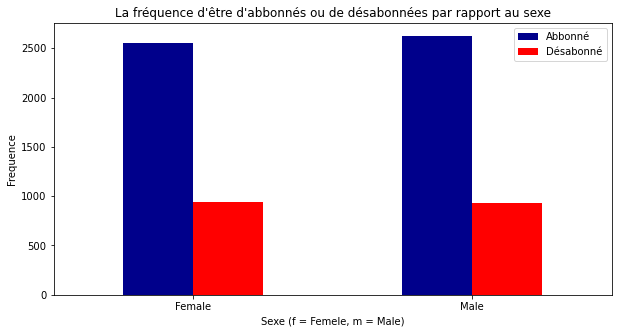

In [25]:
pd.crosstab(churn_DF['gender'],churn_DF['Churn']).plot(kind="bar",figsize=(10,5),color=['darkblue','red' ])
plt.title("La fréquence d'être d'abbonnés ou de désabonnées par rapport au sexe")
plt.xlabel('Sexe (f = Femele, m = Male)')
plt.xticks(rotation=0)
plt.legend(["Abbonné", "Désabonné"])
plt.ylabel('Frequence')
plt.show()

La figure dessus représente un digramme en bâtons qui décrit la fréquence d’abbonement de la population en fonction de sexe. On constate sur cette figure que les nombres des deux sexes sont équitablement distibués au nombres Abbonnées et au nombres de Désabbonnés.

<h6>Taux de souscription à l'offre de Internet Service</h6>

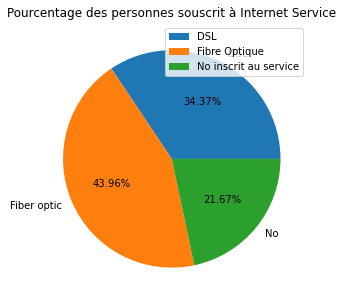

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
count = Counter(churn_DF['InternetService'])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Pourcentage des personnes souscrit à Internet Service')
plt.legend(["DSL","Fibre Optique","No inscrit au service"])
plt.show()

La figure desssus représente un diagramme circulaire décrivant les taux des personnes Souscrites à l'offre d'internet. On constate sur ce diagramme que la plupart des personnes sont souscrit à l'offre internet avec Fibre Optique avec 43,96%.

## 4-2 Data Integration
Etant donné qu'on travaille sur un seul dataset, y'a pas besoin de faire cette étape

## 4-3 Data Transformation
Comme c'était le cas à partir de la partie de data understanding (section 3), on a été confronté à beaucoup de problemes, notamment sur la non distribution des données en loi gaussienne, aussi le probleme de imbalanced data car les labels classification ne sont pas equally representé.


### Imbalanced data
Pour résoudre ce probleme, on va faire appel aux méthodes de data oversampling pour faire un dataset balanced.
<br> Dans cette partie, on vas utilisé deux méthodes de Oversampling.

#### Imbalanced data avec Oversampling(resample)

Valeurs des Churn 1(Yes) et 0(No) apres l'Oversampling avec la methode de Resampling 
1    5174
0    5174
Name: Churn, dtype: int64
Bar plot du dataset balanced(label=Class)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

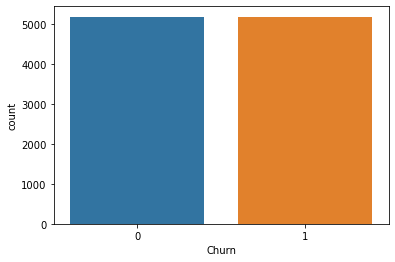

In [27]:
#Imbalanced Data
#Pour ce probleme on vas utiliser Oversampling:qui consiste à compléter les données de formation avec plusieurs
# copies de certaines des classes minoritaires. 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Encodage de label "Class" en 0 et 1 au lieu d'un YES et NO
churn_DF['Churn'] = le.fit_transform(churn_DF['Churn'])


from sklearn.utils import resample
#creation de deux dataframes de majority et minority class 
df_majority = churn_DF[(churn_DF['Churn'] == 0)] 
df_minority = churn_DF[(churn_DF['Churn'] == 1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 5174, # to match majority class
                                 random_state=42)  # reproducible results

# Combination de la classe majority avec l'upsampled minority class
churn_DF_balanced_Oversampling = pd.concat([df_minority_upsampled, df_majority])

#affichage de nombres d'instances de chaque classe
print("Valeurs des Churn 1(Yes) et 0(No) apres l'Oversampling avec la methode de Resampling ")
print(churn_DF_balanced_Oversampling['Churn'].value_counts())

#affichage de nombres d'instances de chaque classe en plot bar
print("Bar plot du dataset balanced(label=Class)")
sns.countplot(churn_DF_balanced_Oversampling['Churn'])

#### Imbalanced data avec Oversampling(ROS RandomOverSampler)

3305  nombre de nouveaux valeurs prises
Valeurs des Churn 1(Yes) et 0(No) apres l'Oversampling avec lamethode de RandomOverSampler
1    5174
0    5174
Name: Churn, dtype: int64
Bar plot du dataset balanced(label=Class)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


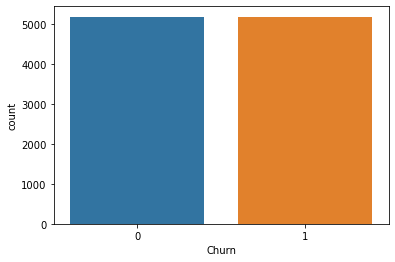

In [28]:
from imblearn.over_sampling import RandomOverSampler

X=churn_DF.drop(columns=['customerID','Churn'])
y= churn_DF.Churn 
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

print(X_ros.shape[0] - X.shape[0], ' nombre de nouveaux valeurs prises')

#affichage de nombres d'instances de chaque classe
print("Valeurs des Churn 1(Yes) et 0(No) apres l'Oversampling avec lamethode de RandomOverSampler")
print(y_ros.value_counts())

#affichage de nombres d'instances de chaque classe en plot bar
print("Bar plot du dataset balanced(label=Class)")
sns.countplot(y_ros)

#Concat des Features et du label
churn_DF_balanced_RandomOversampling = pd.DataFrame(data=pd.concat([X_ros, y_ros], axis = 1))


### Gaussian Distibution
Apres avoir passé la phase de Imbalanced Data, on va devoir faire la phase de Gaussian Distribution ou on va essayer de mettre chaque distribution de données d'une colonne en une distibution en loi normal, celà en deux parties car on a deux types de méthodes de Imbalanced Data 

###### Gaussian distrubution pour  "Churn balanced Oversampled dataset with Resample"

In [29]:
#Gaussian Distribution 

#Affichage de Skeweness pour chaque colonne du dataset avant la transformation
print("Le Skew de chaque colonne de resample avant la transformation:")
print(churn_DF_balanced_Oversampling.skew())

Le Skew de chaque colonne de resample avant la transformation:
SeniorCitizen     1.556938
tenure            0.505281
MonthlyCharges   -0.382411
TotalCharges      1.126034
Churn             0.000000
dtype: float64


Text(0.5, 1.0, 'Distribution des données de chaque colonne  de resample avant transformation')

<Figure size 432x288 with 0 Axes>

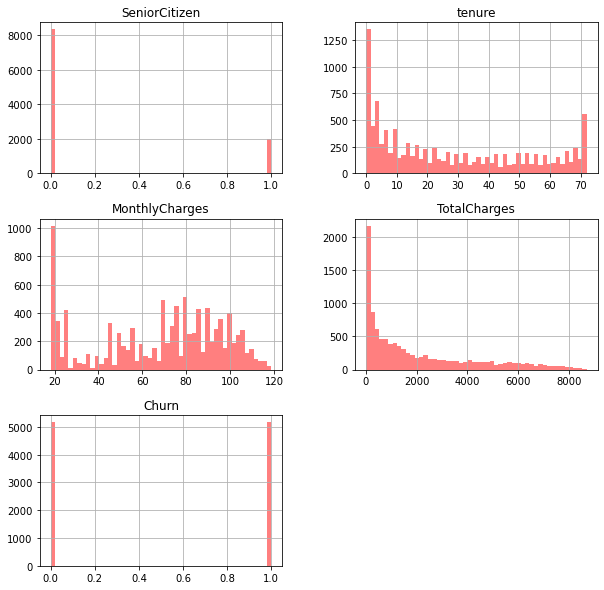

In [30]:
plt.figure()

#Affichage de la distribution pour chaque colonne du dataset avant la transformation avec des plots bars
churn_DF_balanced_Oversampling.hist(color="r", alpha=0.5, bins=50, figsize=(10,10))
plt.title("Distribution des données de chaque colonne  de resample avant transformation")

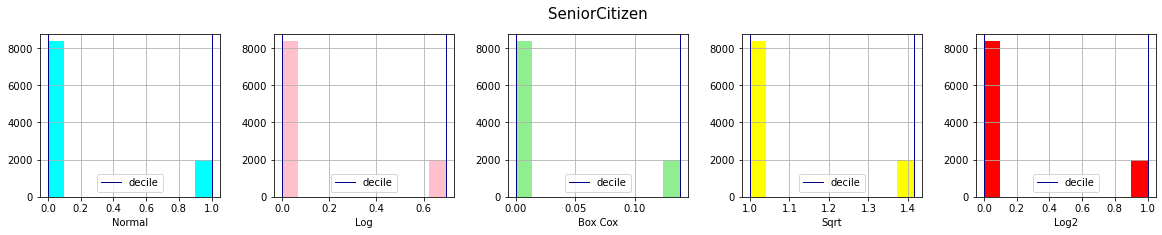

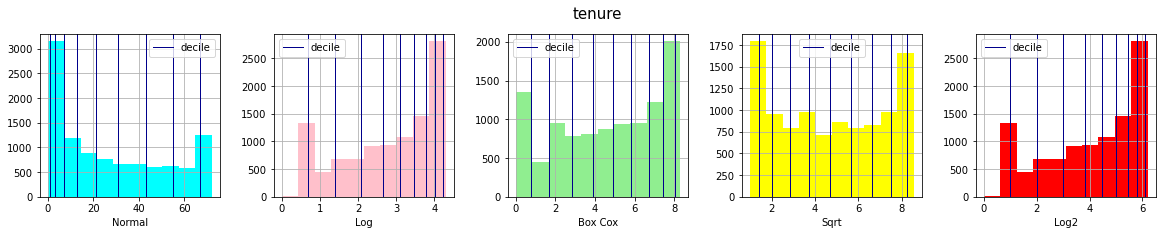

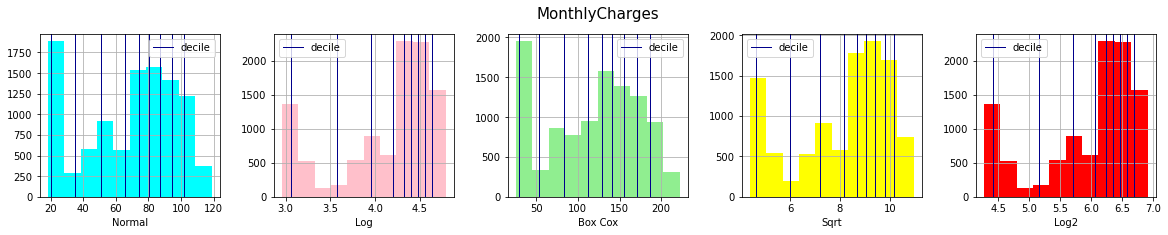

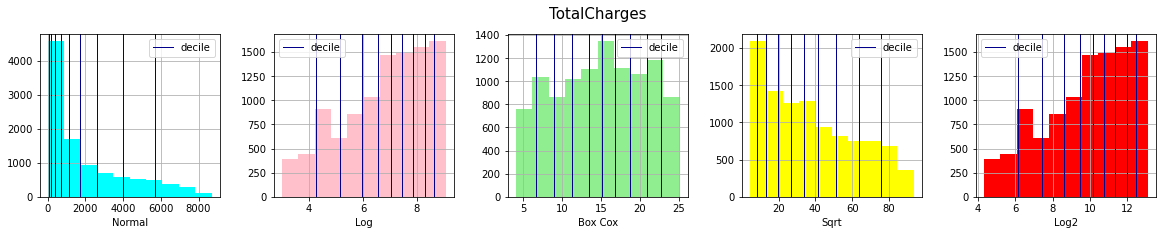

In [31]:
#On fait des plots des données dans leur forme normal sans aucune transformations puis Avec LOG et BOXCOX et sqrt et log2
#puis on regarde la meilleur des courbes qui forme une loi normale, puis onn choisit la fonction qui a donné ce resultat.
from scipy import stats

#Colonnes numeriques
cols =['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

for col in cols:
    i = 0
    
    fig, axes = plt.subplots(1, 5, figsize=(20, 3))
    
    f1 = churn_DF_balanced_Oversampling[col]
    f2 = (churn_DF_balanced_Oversampling[col]+1).transform(np.log)
    f3 = pd.DataFrame(stats.boxcox(churn_DF_balanced_Oversampling[col]+1)[0])
    f4 = (churn_DF_balanced_Oversampling[col]+1).transform(np.sqrt)
    f5 = (churn_DF_balanced_Oversampling[col]+1).transform(np.log2)

    
    for column in [[f1, 'cyan', 'Normal'], [f2, 'pink', 'Log'], [f3, 'lightgreen', 'Box Cox'],[f4, 'yellow', 'Sqrt']
                   ,[f5, 'red', 'Log2']
                   ]:
        feature = column[0]
        colour = column[1]
        name = column[2]
        
        feature.hist(ax=axes[i], color=colour)
        deciles = feature.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
        
        for pos in np.array(deciles).reshape(1, -1)[0]:
            handle = axes[i].axvline(pos, color='darkblue', linewidth=1)

        axes[i].legend([handle], ['decile'])
        axes[i].set_xlabel(name)
        
        i += 1 
    
    axes[2].set_title(col, fontsize=15, pad=15)
                    
    plt.show()

plt.show()

A partir des plots qu'on ci dessus, on peut dire que 'SeniorCitizen' aucune transformation marche dessus car il a des valeurs binaires, puis pour 'tenure' MonthlyCharges' et 'TotalCharges' ont une distribution mielleur avec CoxBOX.

In [32]:
#Transformation des colonnes en question en utilisant du BOXCOX et SQRT

churn_DF_balanced_Oversampling["tenure"] = churn_DF_balanced_Oversampling["tenure"].map(lambda x: sqrt(x))
churn_DF_balanced_Oversampling["MonthlyCharges"], _ = stats.boxcox(churn_DF_balanced_Oversampling["MonthlyCharges"])
churn_DF_balanced_Oversampling["TotalCharges"], _ = stats.boxcox(churn_DF_balanced_Oversampling["TotalCharges"])

#Affichage de Skeweness pour chaque colonne du dataset apres la transformation
print("Le Skew de chaque colonne de resample apres la transformation:")
churn_DF_balanced_Oversampling.skew()

Le Skew de chaque colonne de resample apres la transformation:


SeniorCitizen     1.556938
tenure            0.024693
MonthlyCharges   -0.297375
TotalCharges     -0.121803
Churn             0.000000
dtype: float64

Text(0.5, 1.0, 'Distribution des données de chaque colonne apres transformation')

<Figure size 432x288 with 0 Axes>

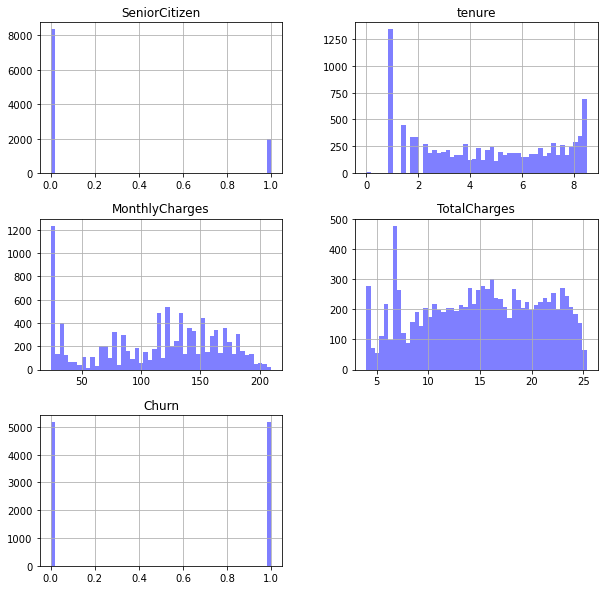

In [33]:
plt.figure()

#Affichage de la distribution pour chaque colonne du dataset apres la transformation avec des plots bars
churn_DF_balanced_Oversampling.hist(color="b", alpha=0.5, bins=50, figsize=(10,10))
plt.title("Distribution des données de chaque colonne apres transformation")


A partir de ce dernier plot, on voit les resultats qu'on a eu apres les transformations faites dessus.

###### Gaussian distrubution pour  "Churn balanced Oversampled dataset with RandomOverSampler"

In [34]:
#Gaussian Distribution 

#Affichage de Skeweness pour chaque colonne du RandomOverSampler dataset avant la transformation
print("Le Skew de chaque de colonne du RandomOverSampler avant la transformation:")
print(churn_DF_balanced_RandomOversampling.skew())

Le Skew de chaque de colonne du RandomOverSampler avant la transformation:
SeniorCitizen     1.518918
tenure            0.508865
MonthlyCharges   -0.388665
TotalCharges      1.123424
Churn             0.000000
dtype: float64


Text(0.5, 1.0, 'Distribution des données de chaque colonne du RandomOverSampler avant transformation')

<Figure size 432x288 with 0 Axes>

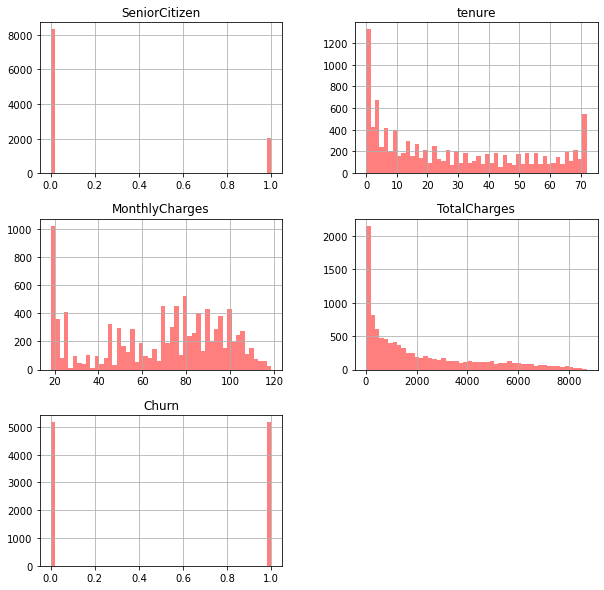

In [35]:
plt.figure()

#Affichage de la distribution pour chaque colonne du dataset avant la transformation avec des plots bars
churn_DF_balanced_RandomOversampling.hist(color="r", alpha=0.5, bins=50, figsize=(10,10))
plt.title("Distribution des données de chaque colonne du RandomOverSampler avant transformation")

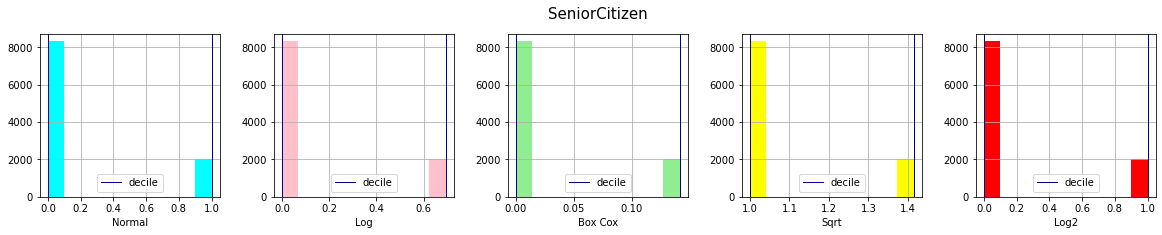

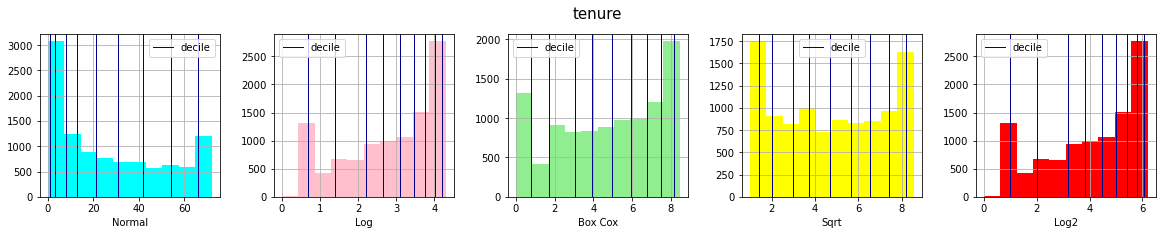

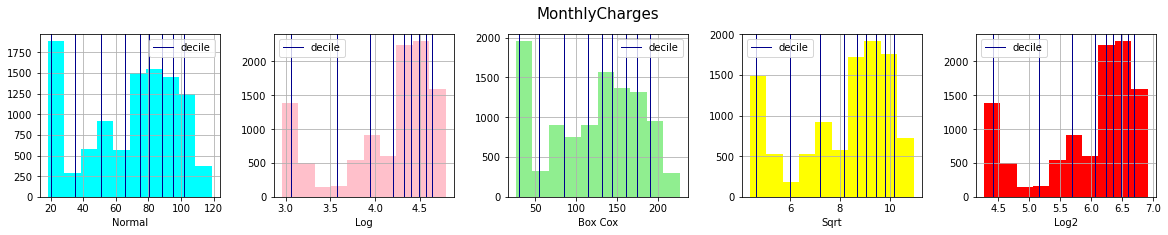

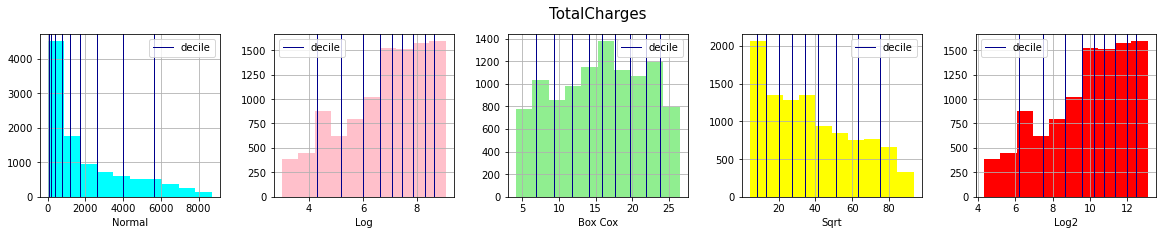

In [36]:
#On fait des plots des données dans leur forme normal sans aucune transformations puis Avec LOG et BOXCOX et sqrt et log2
#puis on regarde la meilleur des courbes qui forme une loi normale, puis onn choisit la fonction qui a donné ce resultat.
from scipy import stats

cols =['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

for col in cols:
    i = 0
    
    fig, axes = plt.subplots(1, 5, figsize=(20, 3))
    
    f1 = churn_DF_balanced_RandomOversampling[col]
    f2 = (churn_DF_balanced_RandomOversampling[col]+1).transform(np.log)
    f3 = pd.DataFrame(stats.boxcox(churn_DF_balanced_RandomOversampling[col]+1)[0])
    f4 = (churn_DF_balanced_RandomOversampling[col]+1).transform(np.sqrt)
    f5 = (churn_DF_balanced_RandomOversampling[col]+1).transform(np.log2)

    
    for column in [[f1, 'cyan', 'Normal'], [f2, 'pink', 'Log'], [f3, 'lightgreen', 'Box Cox'],[f4, 'yellow', 'Sqrt']
                   ,[f5, 'red', 'Log2']
                   ]:
        feature = column[0]
        colour = column[1]
        name = column[2]
        
        feature.hist(ax=axes[i], color=colour)
        deciles = feature.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
        
        for pos in np.array(deciles).reshape(1, -1)[0]:
            handle = axes[i].axvline(pos, color='darkblue', linewidth=1)

        axes[i].legend([handle], ['decile'])
        axes[i].set_xlabel(name)
        
        i += 1 
    
    axes[2].set_title(col, fontsize=15, pad=15)
                    
    plt.show()

plt.show()

A partir des plots qu'on ci dessus, on peut dire que 'SeniorCitizen' aucune transformation marche dessus car il a des valeurs binaires, puis pour 'tenure' MonthlyCharges' et 'TotalCharges' ont une distribution mielleur avec CoxBox.

In [37]:
#Transformation de l'age en utilisant du BOXCOX et SQRT

churn_DF_balanced_RandomOversampling["tenure"] = churn_DF_balanced_RandomOversampling["tenure"].map(lambda x: sqrt(x))
churn_DF_balanced_RandomOversampling["MonthlyCharges"], _ = stats.boxcox(churn_DF_balanced_RandomOversampling["MonthlyCharges"])
churn_DF_balanced_RandomOversampling["TotalCharges"], _ = stats.boxcox(churn_DF_balanced_RandomOversampling["TotalCharges"])

#Affichage de Skeweness pour chaque colonne du dataset apres la transformation
print("Le Skew de chaque colonne du RandomOversampling apres la transformation:")
churn_DF_balanced_RandomOversampling.skew()

Le Skew de chaque colonne du RandomOversampling apres la transformation:


SeniorCitizen     1.518918
tenure            0.017534
MonthlyCharges   -0.302192
TotalCharges     -0.126095
Churn             0.000000
dtype: float64

Text(0.5, 1.0, 'Distribution des données de chaque colonne du RandomOversampling apres transformation')

<Figure size 432x288 with 0 Axes>

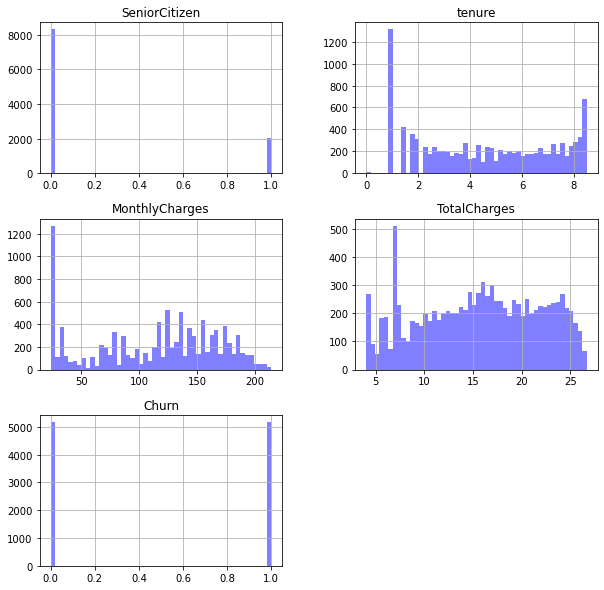

In [38]:
plt.figure()

#Affichage de la distribution pour chaque colonne du dataset apres la transformation avec des plots bars
churn_DF_balanced_RandomOversampling.hist(color="b", alpha=0.5, bins=50, figsize=(10,10))
plt.title("Distribution des données de chaque colonne du RandomOversampling apres transformation")


A partir de ce dernier plot, on voit les resultats qu'on a eu apres les transformations faites dessus.

## 4-4 Data Reduction
Le but de cette partie est de réduire le nombre de colonnes et tuples qui peuvent avoir un effet négatif ou celles qui n'apporte rien sur le model du classification.
<br> Sur cette partie, on va la faire en deux sous parties puisque on fait des études sur deux DataFrames des deux techniques de 'Imbalanced Data processing'.

### Suppression de quelques colonnes 
A partir de l'étude éffectue en dessous, on voit qu'il y'a quelques colonnes si on les supprime çà va pas influencer sur le model de prédiction.<br>
Parmi ces colonnes:<br>
<b>customerID:</b> Elle sera supprimé car elle represente juste l'identifiant de la personne ayant participé à cette étude.
<br>

<b>tenure:</b> A partir des matrices de corrélation qu'on a, on voit que la correlation entre tenure et totalcharges depassent les 90% et tenure et contract çà depassent les 60%, qui sont les deux plus grosses corrélations entre les attributs des deux datasets donc on est amené à supprimer tenure.
<br>



### 4-4-1 Typage des colonnes non numéric  avec Label encoding
##### 4-4-1-1 churn_DF_balanced_Oversampling with resample method Label encoding

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#On supprime la colonne customerID dés le depart
churn_DF_balanced_Oversampling = churn_DF_balanced_Oversampling.drop(columns="customerID")
# integer encoding
label_encoder = LabelEncoder()

#La on va encoder les colonnes Object avec label encoder
for i in churn_DF_balanced_Oversampling.columns:
    if(churn_DF_balanced_Oversampling[i].dtype == np.float64 or churn_DF_balanced_Oversampling[i].dtype == np.int64):
        pass
    else:
        churn_DF_balanced_Oversampling[i] = label_encoder.fit_transform(churn_DF_balanced_Oversampling[i])

churn_DF_balanced_Oversampling

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4290,0,0,1,1,1.000000,0,1,0,0,0,0,2,2,0,0,0,2,59.624927,5.436057,1
5547,0,0,0,0,1.732051,1,0,1,0,0,0,0,2,2,0,1,2,151.213204,9.895670,1
3302,1,0,0,0,5.567764,1,2,1,0,2,2,0,2,2,1,1,2,178.869020,19.679511,1
4949,1,0,0,0,2.236068,0,1,0,0,2,0,0,2,2,0,1,3,78.875677,10.625206,1
4307,0,1,0,0,6.082763,1,2,1,0,0,0,0,2,2,0,1,2,165.163852,20.449026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,8.485281,1,0,2,1,1,1,1,1,1,2,1,0,28.135403,16.184717,0
7038,1,0,1,1,4.898979,1,2,0,2,0,2,2,2,2,1,1,3,142.164790,17.653601,0
7039,0,0,1,1,8.485281,1,2,1,0,2,2,0,2,2,1,1,1,178.370017,24.357374,0
7040,0,0,1,1,3.316625,0,1,0,2,0,0,0,0,0,0,1,2,41.809202,11.015484,0


##### 4-4-1-2 churn_DF_balanced_RandomOversampling with RandomOversampler method Label encoding

In [40]:
#La on va encoder les colonnes Object avec label encoder

for i in churn_DF_balanced_RandomOversampling.columns:
    if(churn_DF_balanced_RandomOversampling[i].dtype == np.float64 or churn_DF_balanced_RandomOversampling[i].dtype == np.int64):
        pass
    else:
        churn_DF_balanced_RandomOversampling[i] = label_encoder.fit_transform(churn_DF_balanced_RandomOversampling[i])

churn_DF_balanced_RandomOversampling

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.000000,0,1,0,0,2,0,0,0,0,0,1,2,42.769681,4.922739,0
1,1,0,0,0,5.830952,1,0,0,2,0,2,0,0,0,1,0,3,91.092201,18.159638,0
2,1,0,0,0,1.414214,1,0,0,2,2,0,0,0,0,0,1,3,85.340407,7.897191,1
3,1,0,0,0,6.708204,0,1,0,2,0,2,2,0,0,1,0,0,64.379445,18.035776,0
4,0,0,0,0,1.414214,1,0,1,0,0,0,0,0,0,0,1,2,117.160227,8.818542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,0,1,0,7.681146,1,2,1,2,2,2,0,2,2,1,1,2,196.010458,24.797864,1
10344,1,0,1,1,4.358899,1,2,1,0,0,0,0,0,2,0,1,2,142.442660,16.984153,1
10345,1,0,0,1,5.567764,1,2,0,0,2,0,2,2,2,1,1,3,134.171893,19.703336,1
10346,1,1,0,0,2.828427,1,0,1,0,0,0,0,0,0,0,1,2,115.235892,13.055637,1


###  4-4-2 Etude sur le choix de suppression de quelques colonnes:
#####  4-4-2-1 Oversampled DataSet using resample

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


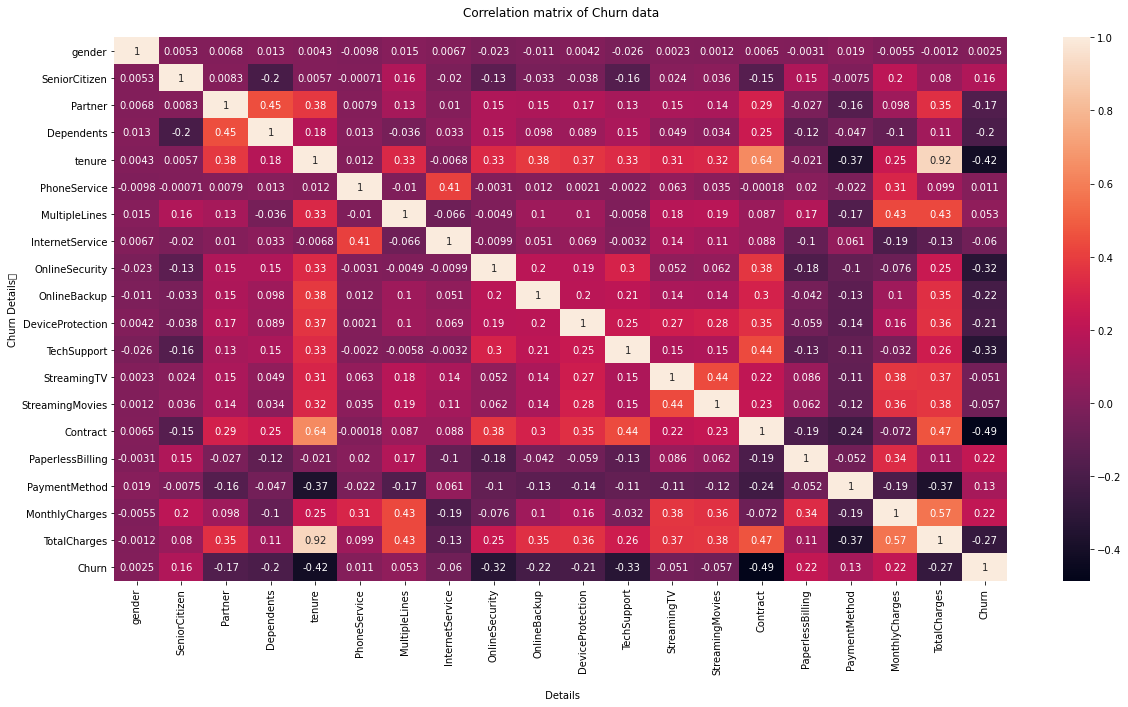

In [41]:
#Affichage de la matrice de corrélation
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

hm = sns.heatmap(ax=ax,data=churn_DF_balanced_Oversampling.corr(), annot = True)
hm.set(xlabel='\n Details', ylabel='Churn Details\t', title = "Correlation matrix of Churn data\n")

plt.show()

In [42]:
#Suppression des colonnes qu'on a pas besoin
churn_DF_balanced_Oversampling = churn_DF_balanced_Oversampling.drop(columns=['tenure'])


#####  4-4-2-2 Oversampled DataSet using RandomOverSampling

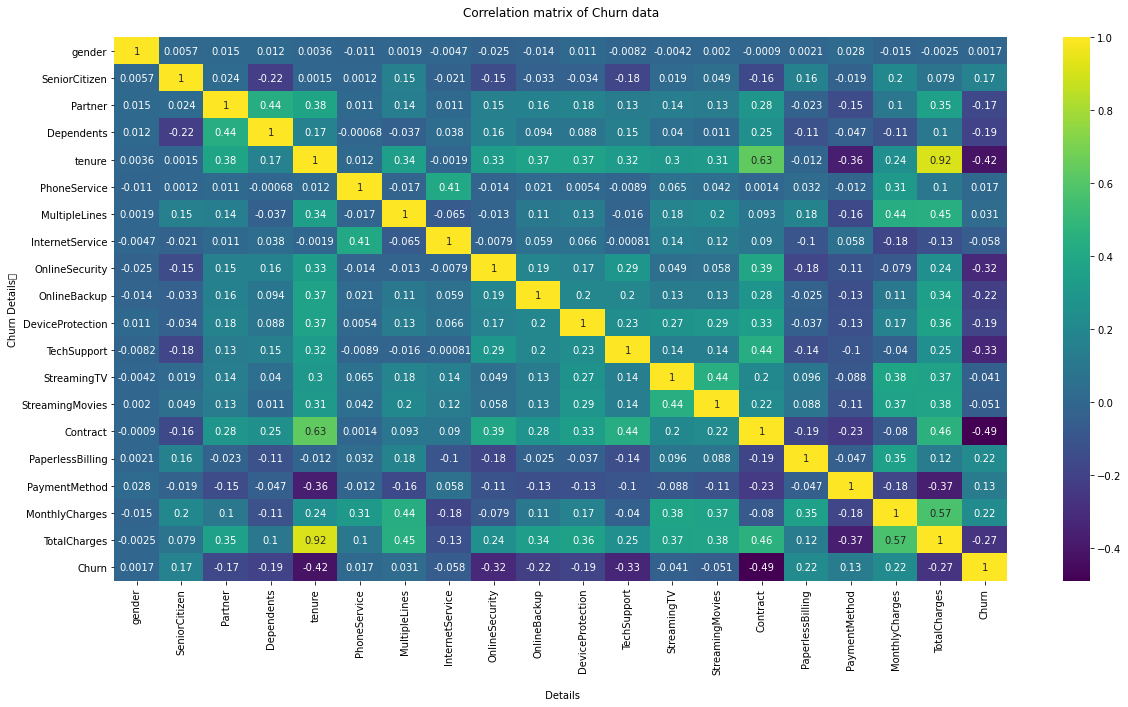

In [43]:
#Affichage de la matrice de corrélation
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

hm = sns.heatmap(ax=ax,data=churn_DF_balanced_RandomOversampling.corr(), annot = True,cmap='viridis')
hm.set(xlabel='\n Details', ylabel='Churn Details\t', title = "Correlation matrix of Churn data\n")

plt.show()

In [44]:
#Suppression des colonnes qu'on a pas besoin
churn_DF_balanced_RandomOversampling = churn_DF_balanced_RandomOversampling.drop(columns=['tenure'])


# 5- Création de l'ensemble de training et de l'ensemble de test pour les deux datasets

## 5-1  Train and Test splitting for Oversampled (with resample method) DataSet  

In [45]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  

Xr= churn_DF_balanced_Oversampling.drop(columns="Churn")
Yr= churn_DF_balanced_Oversampling.Churn

X_train_resample, X_test_resample, Y_train_resample, Y_test_resample = train_test_split(Xr, Yr,test_size=0.20, random_state=42)


## 5-2  Train and Test splitting for Oversampled (with RandomOversamling method) DataSet  

In [46]:
Xros= churn_DF_balanced_RandomOversampling.drop(columns="Churn")
Yros= churn_DF_balanced_RandomOversampling.Churn

X_train_ros, X_test_ros, Y_train_ros, Y_test_ros = train_test_split(Xros, Yros,test_size=0.20, random_state=42)


#  6-  Algorithme de classification
Apres avoir préparer les données dans la partie de preprocessing de données, on va maintenant implimenté un algorithme de classification pour faire de forecasting
## 6-1 Decision Tree
### 6-1-1 Decision Tree on Oversampled (with resample method) DataSet


In [47]:
from sklearn.tree import DecisionTreeClassifier

# Metrics : Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

#Instanciation de model Decision Tree
dti = DecisionTreeClassifier()

#Entrainement de Modele de classification
dti.fit(X_train_resample, Y_train_resample)

#Prediction du modele
pred_res = dti.predict(X_test_resample).astype(int)
print("La précision de modele Decision Tree Classifier est: ",accuracy_score(Y_test_resample, pred_res))

La précision de modele Decision Tree Classifier est:  0.8826086956521739


tn : 834  fp : 192  fn:  51  tp : 993
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1026
           1       0.84      0.95      0.89      1044

    accuracy                           0.88      2070
   macro avg       0.89      0.88      0.88      2070
weighted avg       0.89      0.88      0.88      2070

Confusion matrix
[[834 192]
 [ 51 993]]


<AxesSubplot:>

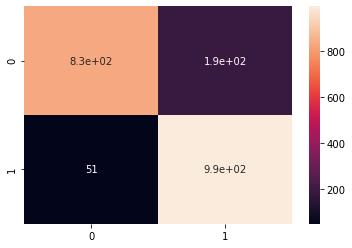

In [48]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp=confusion_matrix(Y_test_resample,pred_res).ravel()

print ("tn :" ,tn," fp :",fp," fn: ",fn," tp :",tp)

# print classification report
print(classification_report(Y_test_resample, pred_res))

#Affichage de la matrice de confusion
cf_matrix = confusion_matrix(Y_test_resample,pred_res)
print("Confusion matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)


Classement des Features qui ont plus d'importance pour la prediction de l'ensemble de Test de Resample dataset


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


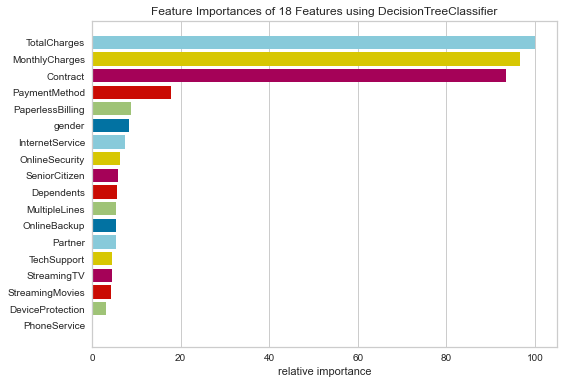

<AxesSubplot:title={'center':'Feature Importances of 18 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [49]:
#Affichage des features importances pendant cette predection
from yellowbrick.features import FeatureImportances

print("Classement des Features qui ont plus d'importance pour la prediction de l'ensemble de Test de Resample dataset")
viz = FeatureImportances(dti)
viz.fit(X_test_resample, pred_res)
viz.poof()

Les colonnes les plus importantes sur cette prediction sont totalcharges et monthly charges avec Contract.

Text(0.5, 1.0, 'Scatter plot on Churn Oversamepled (with resample) prediction on test set dataset')

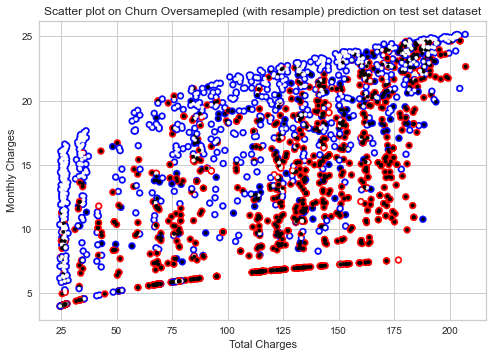

In [52]:
#Affichage des resultats des points test et leur prediction 
#Couleur de Bleu pour: YES Churn de test set de resample
#Couleur de Rouge pour: NO Churn de test set de resample
#Couleur de Blanc pour: YES Churn de prediction pour le test set de resample
#Couleur de Noir pour: NO Churn de prediction pour le test set de resample

plt.scatter(X_test_resample['MonthlyCharges'], X_test_resample['TotalCharges'],c=Y_test_resample , cmap='bwr')
plt.scatter(X_test_resample['MonthlyCharges'], X_test_resample['TotalCharges'],c=pred_res , marker=".",cmap='cubehelix_r')

plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.title('Scatter plot on Churn Oversamepled (with resample) prediction on test set dataset')


On va la plupart des predictions qui sont en noir et blanc ont bien predit les Y_test_resample, sur lequel la prediction était faite, telle que:<br>
Couleur de Bleu pour: YES Churn de test set de Resample
<br>Couleur de Rouge pour: NO Churn de test set de Resample
<br>Couleur de Blanc pour: YES Churn de prediction pour le test set de Resample
<br>Couleur de Noir pour: NO Churn de prediction pour le test set de Resample

### 6-1-2 Decision Tree on Oversampled (with RandomSampling method) DataSet


In [53]:
#Instanciation de model Decision Tree
dti = DecisionTreeClassifier()

#Entrainement de Modele de classification
dti.fit(X_train_ros, Y_train_ros)

#Prediction du modele
pred_ros = dti.predict(X_test_ros).astype(int)
print("La précision de modele Decision Tree Classifier est: ",accuracy_score(Y_test_ros, pred_ros))

La précision de modele Decision Tree Classifier est:  0.8888888888888888


tn : 828  fp : 193  fn:  37  tp : 1012
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1021
           1       0.84      0.96      0.90      1049

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070

Confusion matrix
[[ 828  193]
 [  37 1012]]


<AxesSubplot:>

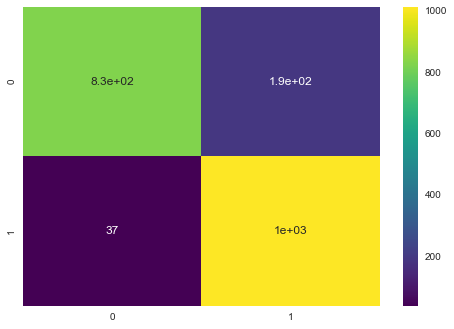

In [54]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp=confusion_matrix(Y_test_ros,pred_ros).ravel()

print ("tn :" ,tn," fp :",fp," fn: ",fn," tp :",tp)

# print classification report
print(classification_report(Y_test_ros, pred_ros))

#Affichage de la matrice de confusion
cf_matrix = confusion_matrix(Y_test_ros,pred_ros)
print("Confusion matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True,cmap="viridis")


Classement des Features qui ont plus d'importance pour la prediction de l'ensemble de Test de RandomOverSampler dataset


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


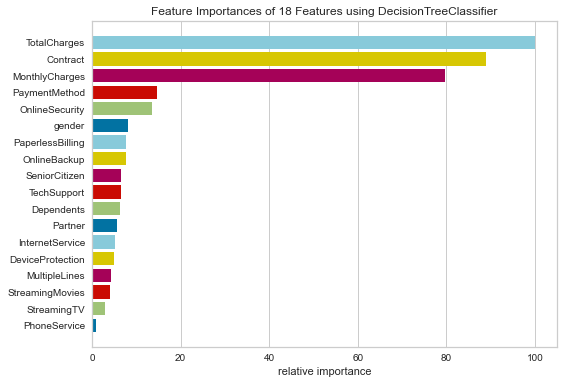

<AxesSubplot:title={'center':'Feature Importances of 18 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [55]:
#Affichage des features importances pendant cette predection

print("Classement des Features qui ont plus d'importance pour la prediction de l'ensemble de Test de RandomOverSampler dataset")
viz = FeatureImportances(dti)
viz.fit(X_test_ros, pred_ros)
viz.poof()

Les colonnes les plus importantes sur cette prediction sont totalcharges et monthly charges avec Contract.

Text(0.5, 1.0, 'Scatter plot on Churn Oversamepled (with RandomOverSampler) prediction on test set dataset')

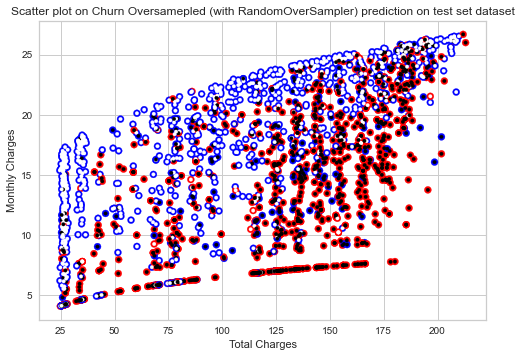

In [57]:
#Affichage des resultats des points test et leur prediction 
#Couleur de Bleu pour: YES Churn de test set de RandomOverSampler
#Couleur de Rouge pour: NO Churn de test set de RandomOverSampler
#Couleur de Blanc pour: YES Churn de prediction pour le test set de RandomOverSampler
#Couleur de Noir pour: NO Churn de prediction pour le test set de RandomOverSampler

plt.scatter(X_test_ros['MonthlyCharges'], X_test_ros['TotalCharges'],c=Y_test_ros , cmap='bwr')
plt.scatter(X_test_ros['MonthlyCharges'], X_test_ros['TotalCharges'],c=pred_ros , marker=".",cmap='cubehelix_r')

plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.title('Scatter plot on Churn Oversamepled (with RandomOverSampler) prediction on test set dataset')


On va la plupart des predictions qui sont en noir et blanc ont bien predit les Y_test_ros, sur lequel la prediction était faite, telle que:<br>
Couleur de Bleu pour: YES Churn de test set de RandomOverSampler
<br>Couleur de Rouge pour: NO Churn de test set de RandomOverSampler
<br>Couleur de Blanc pour: YES Churn de prediction pour le test set de RandomOverSampler
<br>Couleur de Noir pour: NO Churn de prediction pour le test set de RandomOverSampler

# Resultats

A partir des résultats obtenus, on peu conclure que les deux algorithmes de Balancing "Oversampling with resample" et "Oversamoling with RandomOverSampler" apres l'étape de classifications sur les deux datasets, on peut dire qu'ils sont presque équivalent y'a une difference de millieme entre les deux résualtats ou on voit que "la classification avec RandomOverSampler" donne de milleur résultat que l'autre.